In [ ]:
!pip install kaggle --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!kaggle datasets download mikhail1681/walmart-sales

Dataset URL: https://www.kaggle.com/datasets/mikhail1681/walmart-sales
License(s): other
100% 122k/122k [00:00<00:00, 420kB/s]
100% 122k/122k [00:00<00:00, 420kB/s]


In [ ]:
! unzip /content/walmart-sales.zip

Archive:  /content/walmart-sales.zip
  inflating: Walmart_Sales.csv       


In [ ]:
df = pd.read_csv('/content/Walmart_Sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],  format='%d-%m-%Y' ,errors='coerce')
df.info()
#format='%d%b%Y:%H:%M:%S.%f' --->format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


<ipython-input-13-3c0d887a9987>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'],color='g', bins=100, hist_kws={'alpha': 0.4})


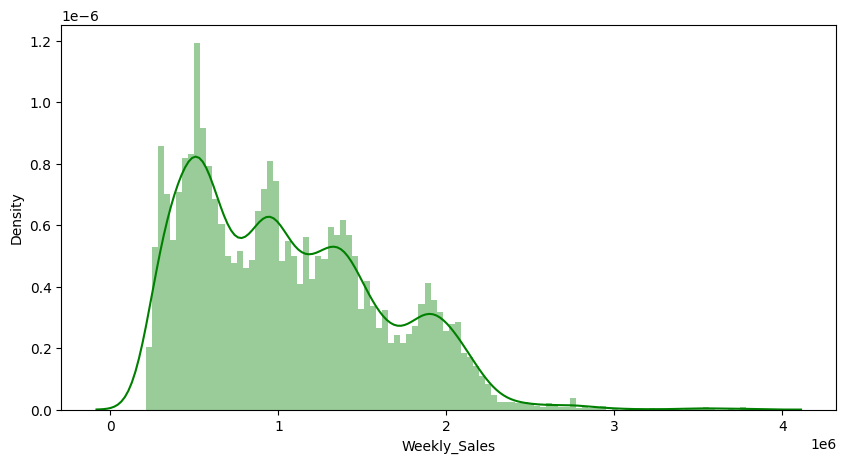

In [ ]:
print(df['Weekly_Sales'].describe())
plt.figure(figsize=(10,5))
sns.distplot(df['Weekly_Sales'],color='g', bins=100, hist_kws={'alpha': 0.4})
plt.show()

In [ ]:
#Plot Numerical data distribution
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.drop(['Store'],axis=1,inplace=True)
df_num.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,0,42.31,2.572,211.096358,8.106
1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1611968.17,0,39.93,2.514,211.289143,8.106
3,1409727.59,0,46.63,2.561,211.319643,8.106
4,1554806.68,0,46.50,2.625,211.350143,8.106


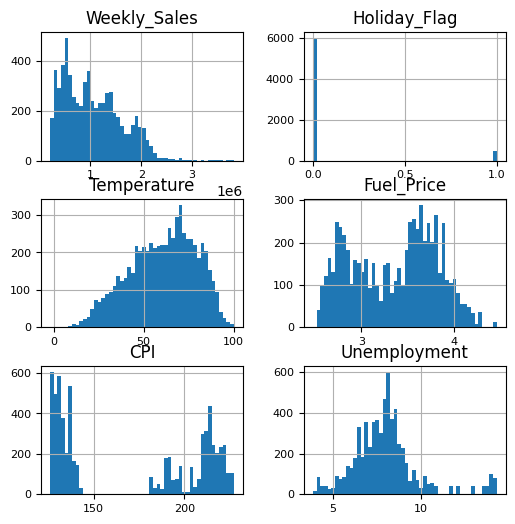

In [ ]:
df_num.hist(figsize=(6, 6), bins=50, xlabelsize=8, ylabelsize=8);

**Training and Testing Data**

In [ ]:
X=df.drop(['Store','Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Feature scaling.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training Model**

In [ ]:
#Train/fit lm on the training data
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
score = reg.score(X_test_scaled, y_test)
print(f"Model R-squared score: {score}")

Model R-squared score: 0.01643335509681909


In [ ]:
#Print out the coefficients of the model
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 20461.52266062 -11655.79299045  -6155.35638953 -65162.5720952
 -84577.45352181]


**Predicting Test Data**

In [ ]:
pred = reg.predict(X_test_scaled)

Text(0, 0.5, 'Predicted Y')

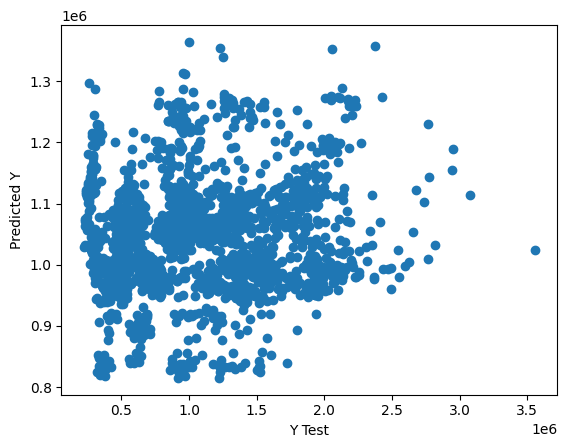

In [ ]:
#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Evaluate The Model**

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 473453.76969367627
MSE: 316081494240.25635
RMSE: 562211.2541031674


<ipython-input-63-35a1b4b9dcd6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred),bins=50);


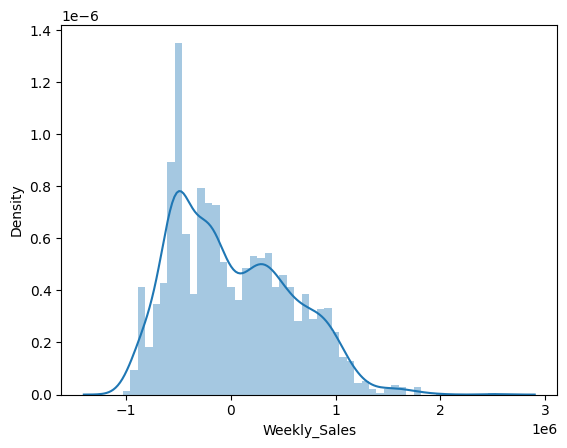

In [ ]:
#Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().
sns.distplot((y_test-pred),bins=50);

In [ ]:
coeffecients = pd.DataFrame(reg.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Holiday_Flag,81684.315817
Temperature,-626.509878
Fuel_Price,-13391.364201
CPI,-1659.478351
Unemployment,-45105.429542


# NOTES & REFERENCE



*   https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python
*   https://www.kaggle.com/code/mikhail1681/walmart-weekly-revenue-prediction#2.-Visualizations./%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.
*   https://github.com/karthickai/Linear-Regression/blob/master/Linear%20Regression%20.ipynb

*   https://www.kaggle.com/code/sherkhango/walmart-sales-7-model-results-97-8-r-coef




